[INFO] Using aligned time grid from 2013-03-01 02:00:00 to 2015-06-12 07:00:00 with freq 0 days 01:00:00 based on DataFrame #8

[Corrélation croisée entre clusters et autres colonnes :]
  ↪ Cluster 01 (12 variables) ↔ autres : corr moyenne = 0.304
  ↪ Cluster 02 (21 variables) ↔ autres : corr moyenne = 0.278
  ↪ Cluster 03 (32 variables) ↔ autres : corr moyenne = 0.127
  ↪ Cluster 04 (8 variables) ↔ autres : corr moyenne = 0.193

[Corrélation entre familles de capteurs :]
       DEWP   NO2  PM10  PM2.5  PRES  TEMP  WSPM
DEWP   0.99  0.06  0.10   0.16  0.76  0.81  0.28
NO2    0.06  0.80  0.53   0.59  0.12  0.26  0.40
PM10   0.10  0.53  0.83   0.76  0.05  0.06  0.15
PM2.5  0.16  0.59  0.76   0.90  0.02  0.09  0.26
PRES   0.76  0.12  0.05   0.02  0.98  0.81  0.04
TEMP   0.81  0.26  0.06   0.09  0.81  0.99  0.05
WSPM   0.28  0.40  0.15   0.26  0.04  0.05  0.72
[WINDOW LIST - Cluster] Fenêtre → 0 days 10:00:00
[WINDOW LIST - Cluster] Fenêtre → 78 days 08:00:00
[WINDOW LIST - Cluster] Fenêtr

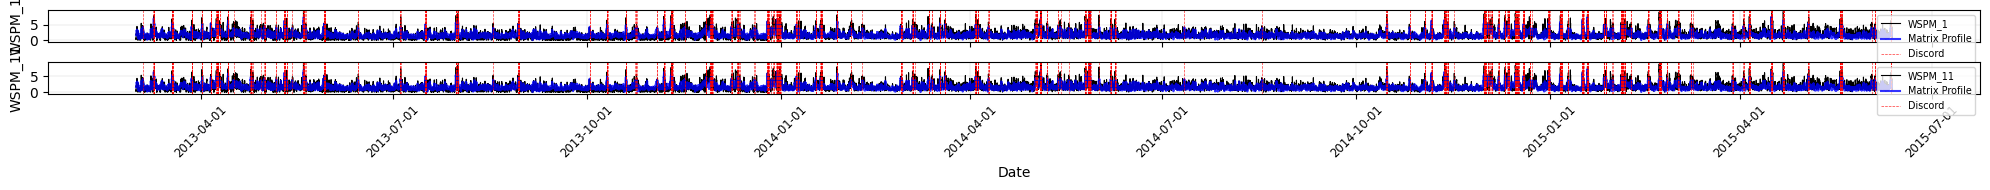

/home/guillaume/swt_package/src/ampiimts/plotting.py:279: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  fig2.tight_layout()


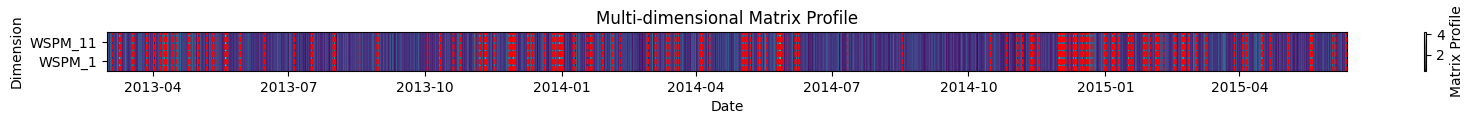


--- Cluster 2 ---


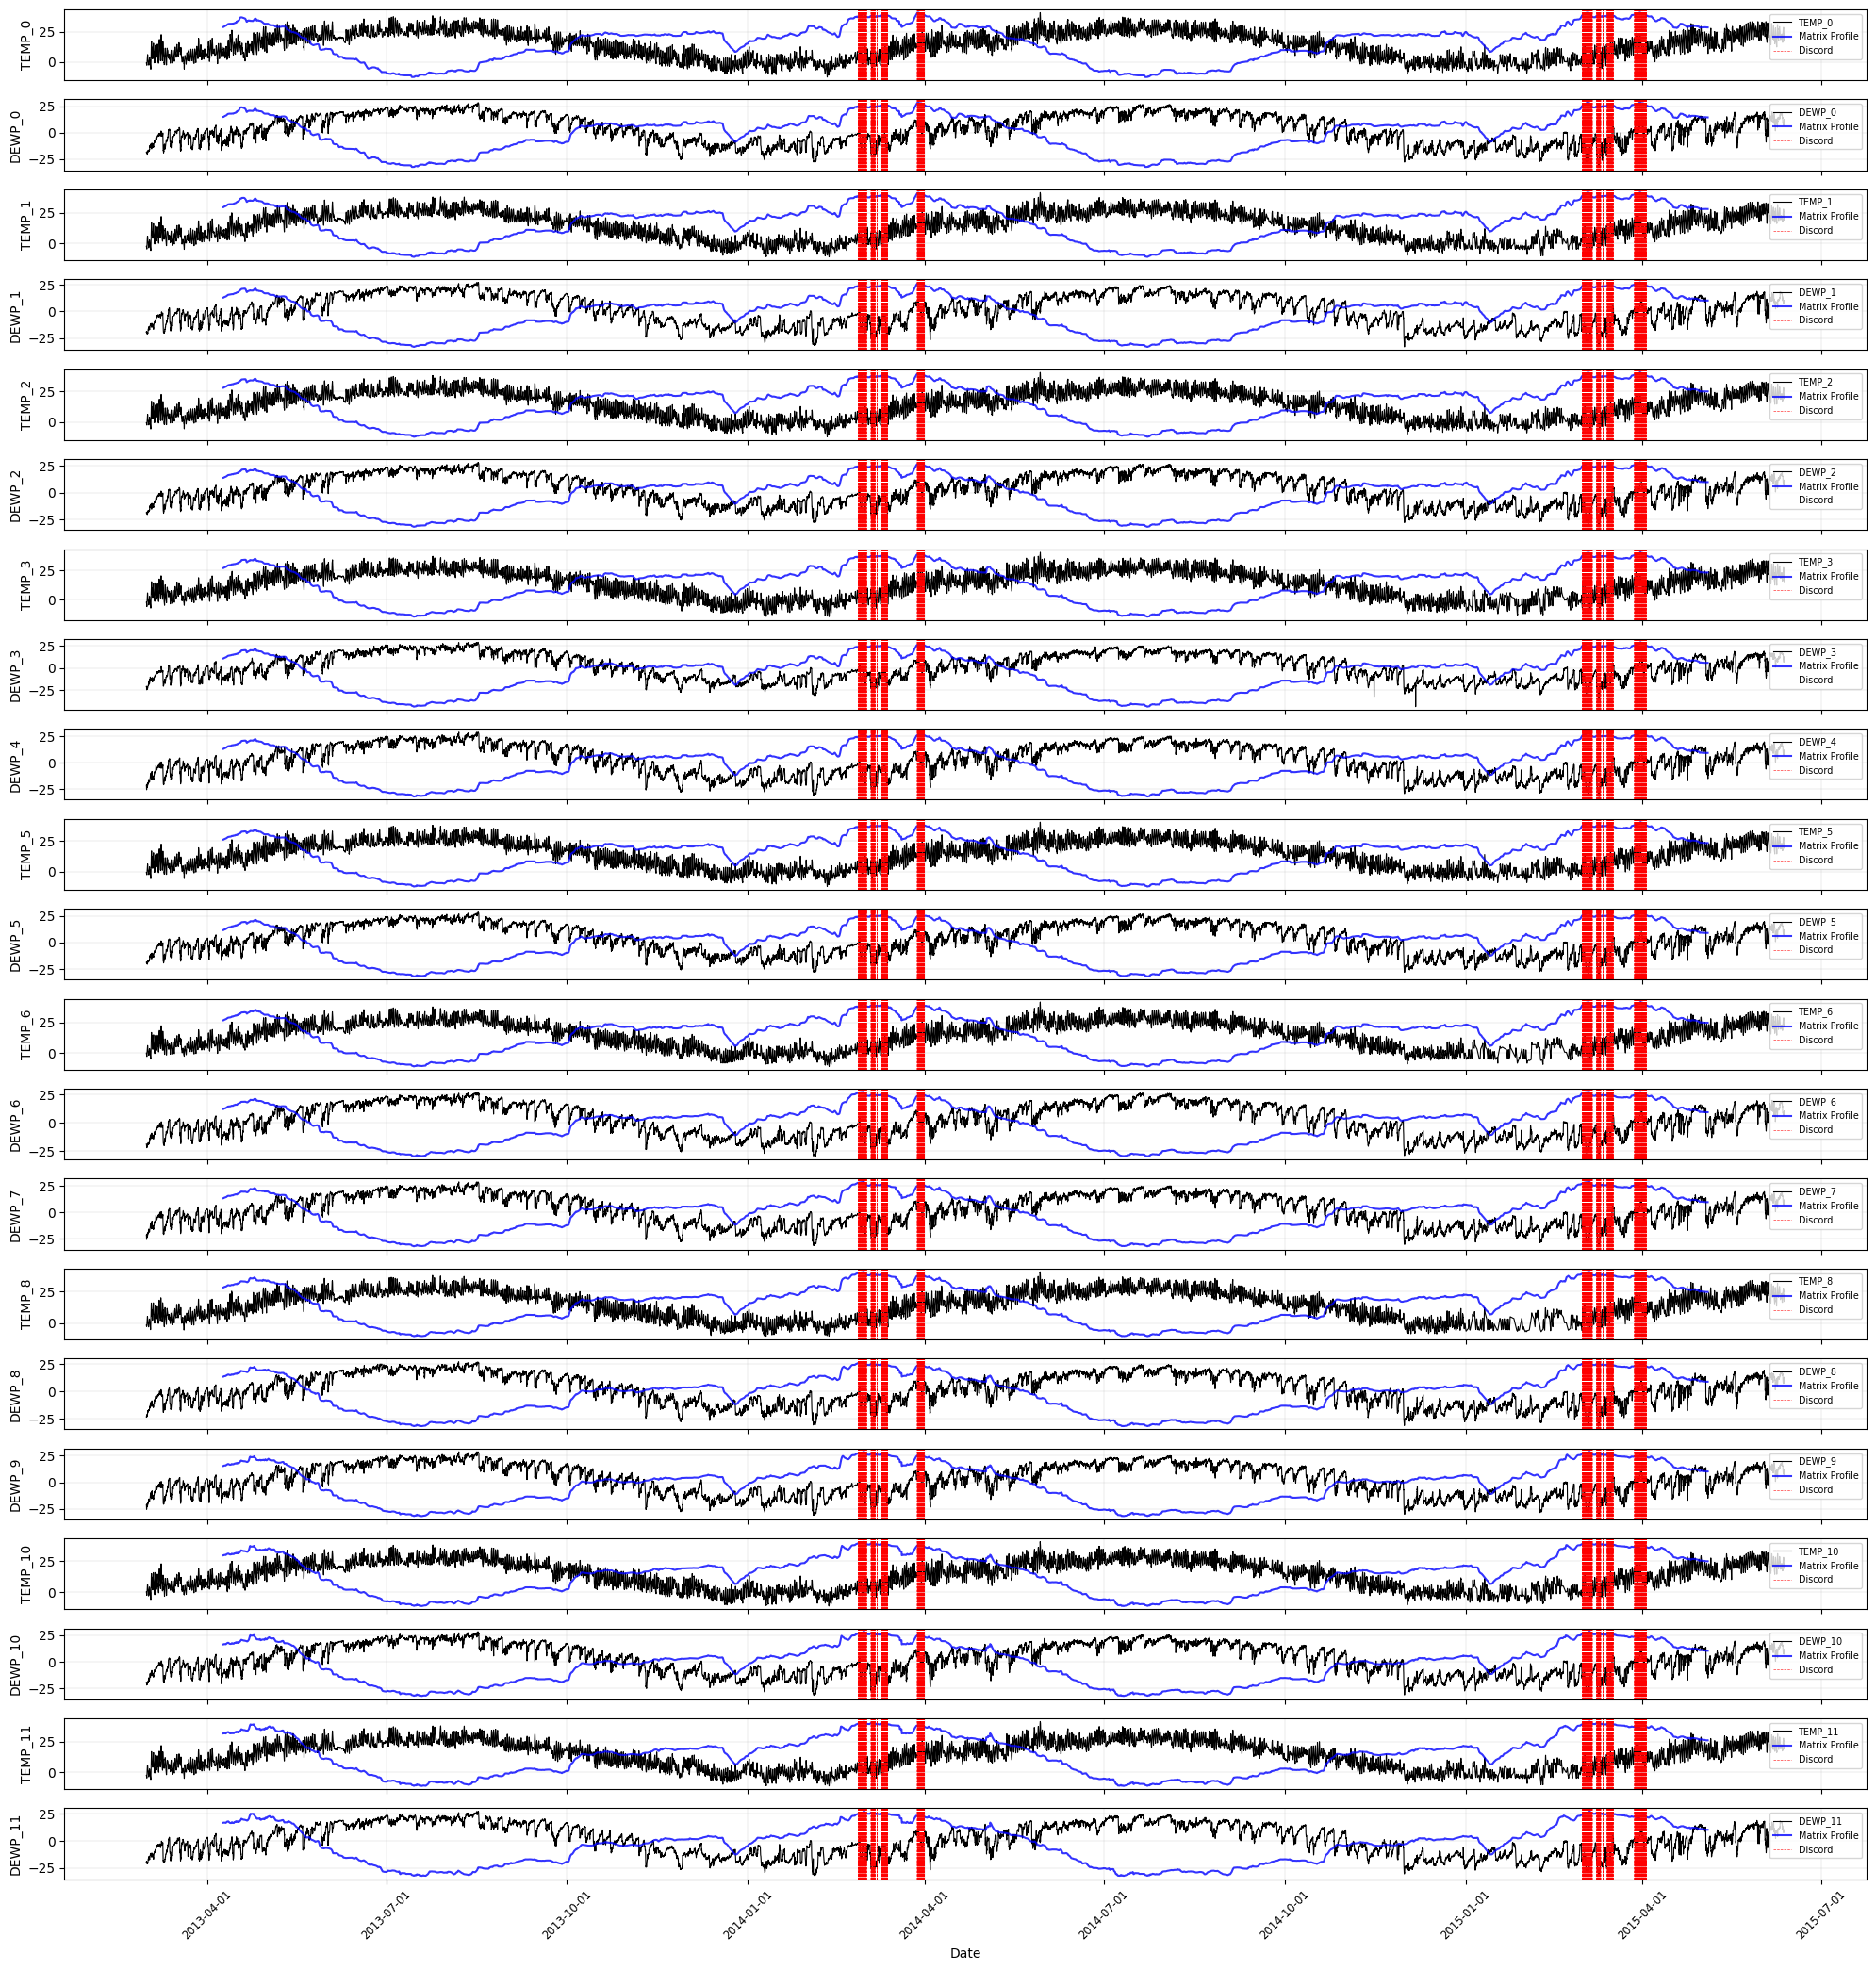

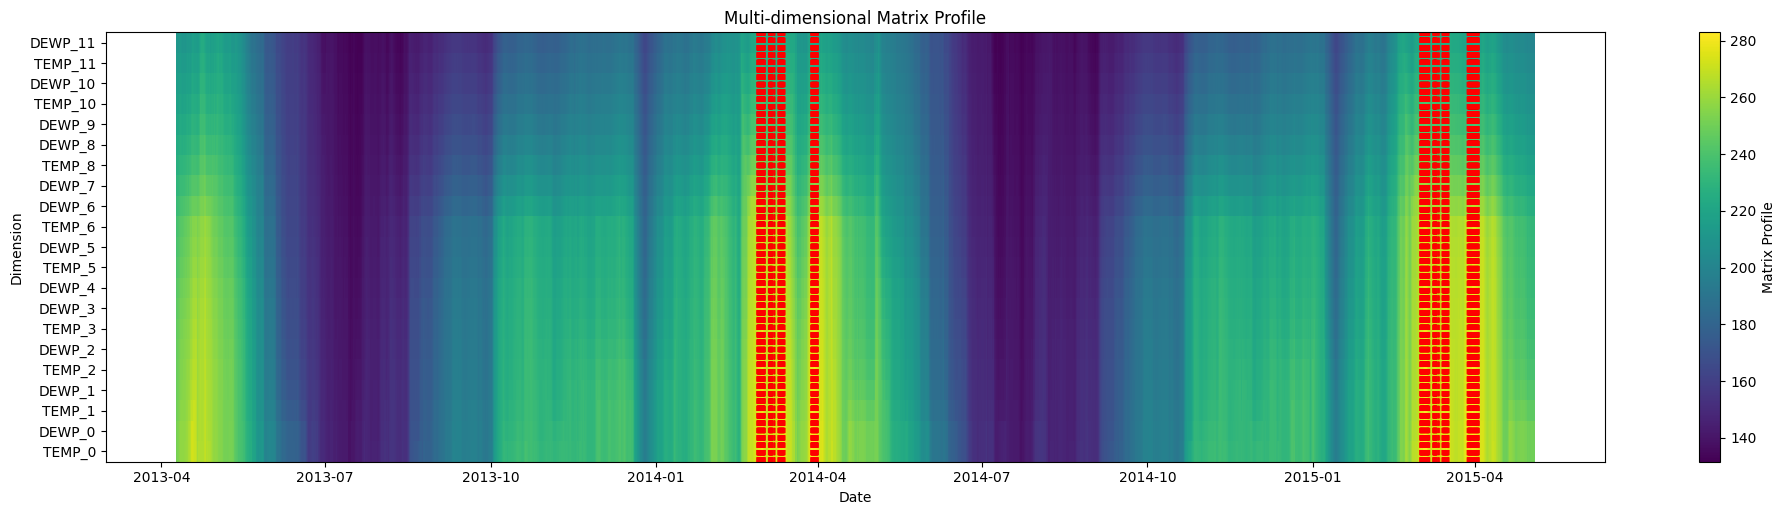


--- Cluster 3 ---


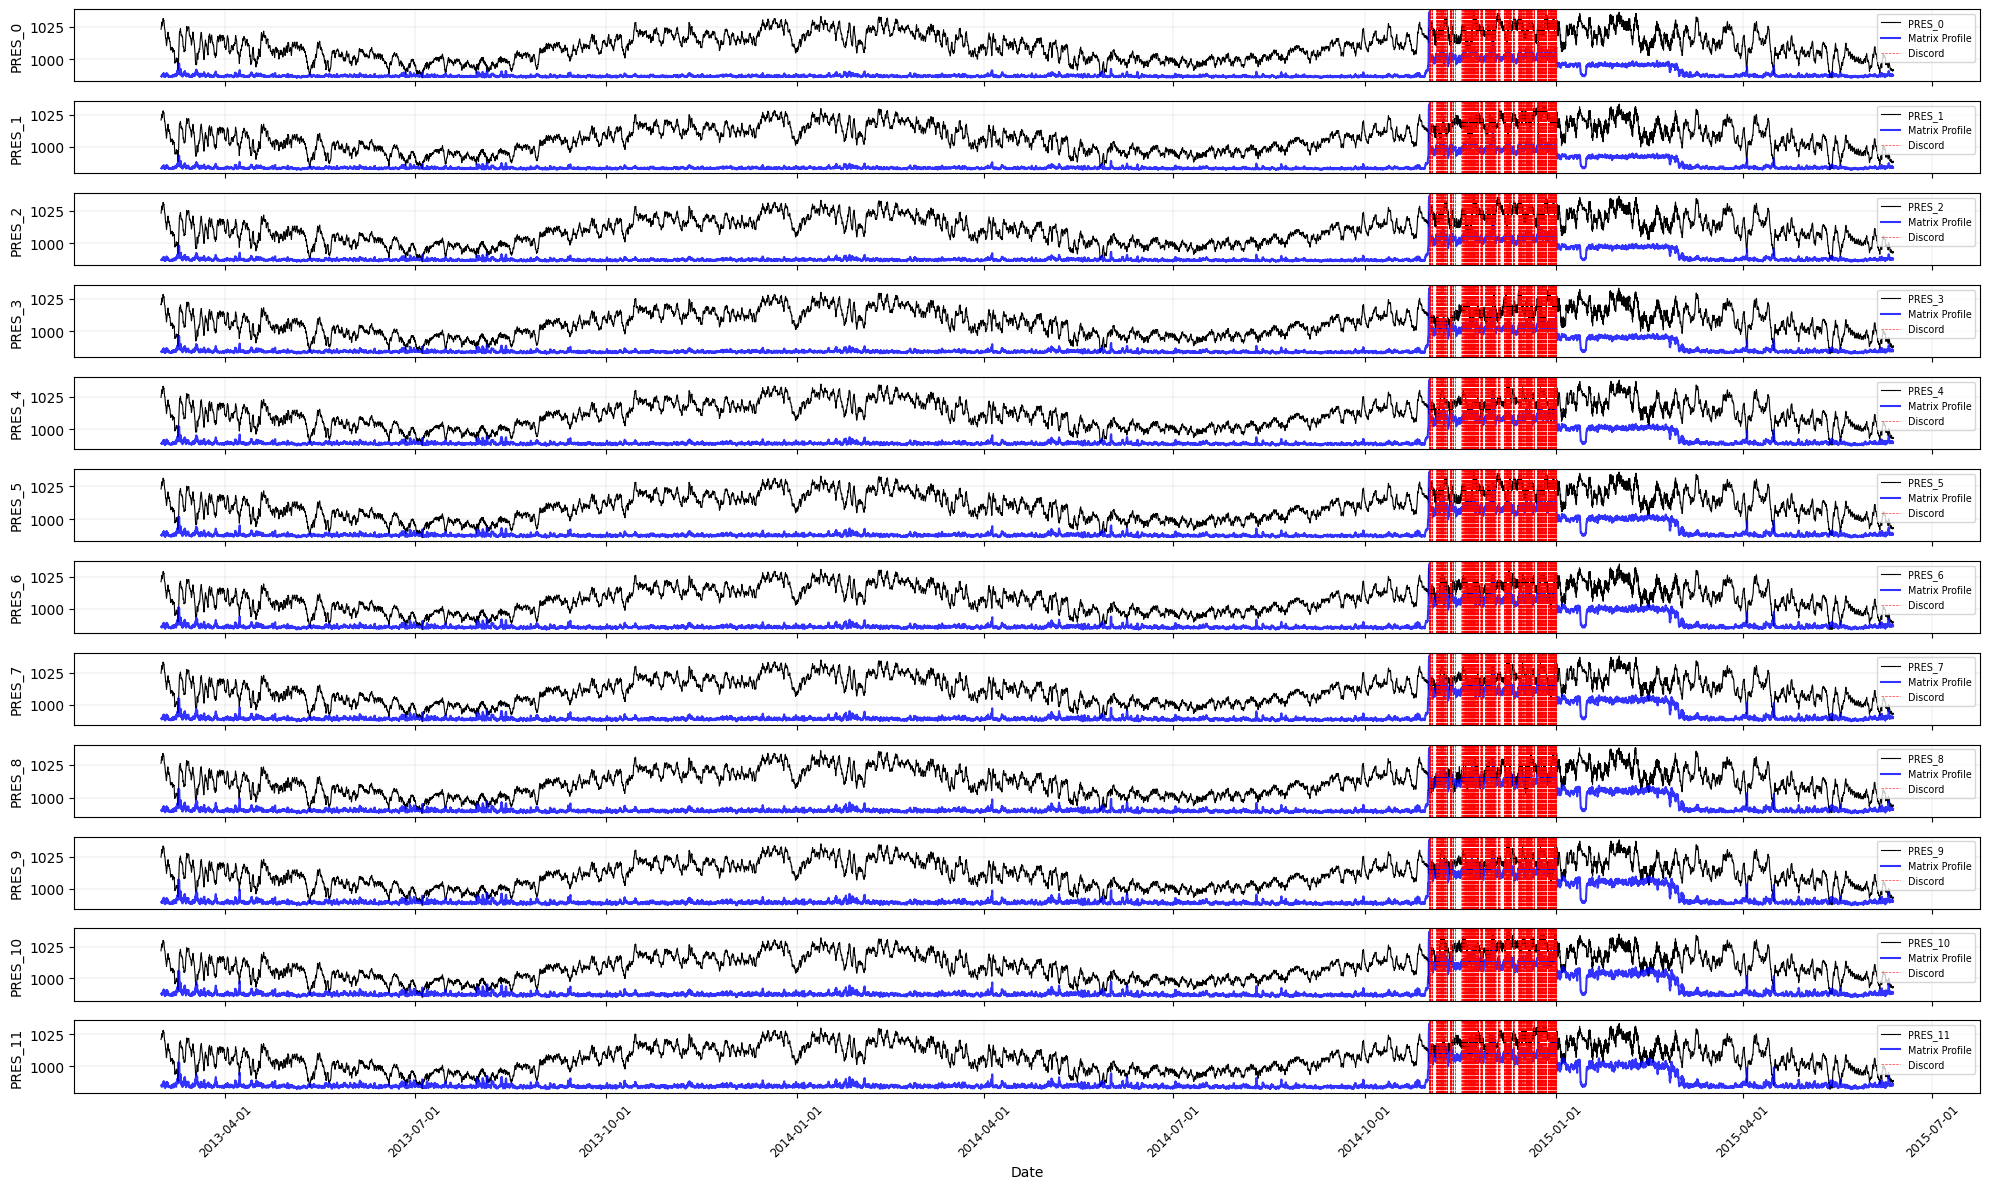

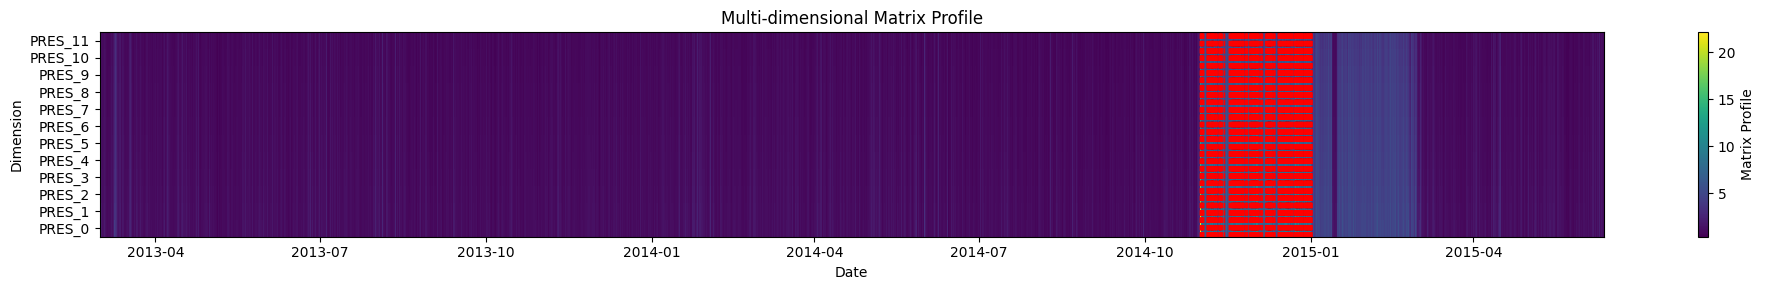


--- Cluster 4 ---


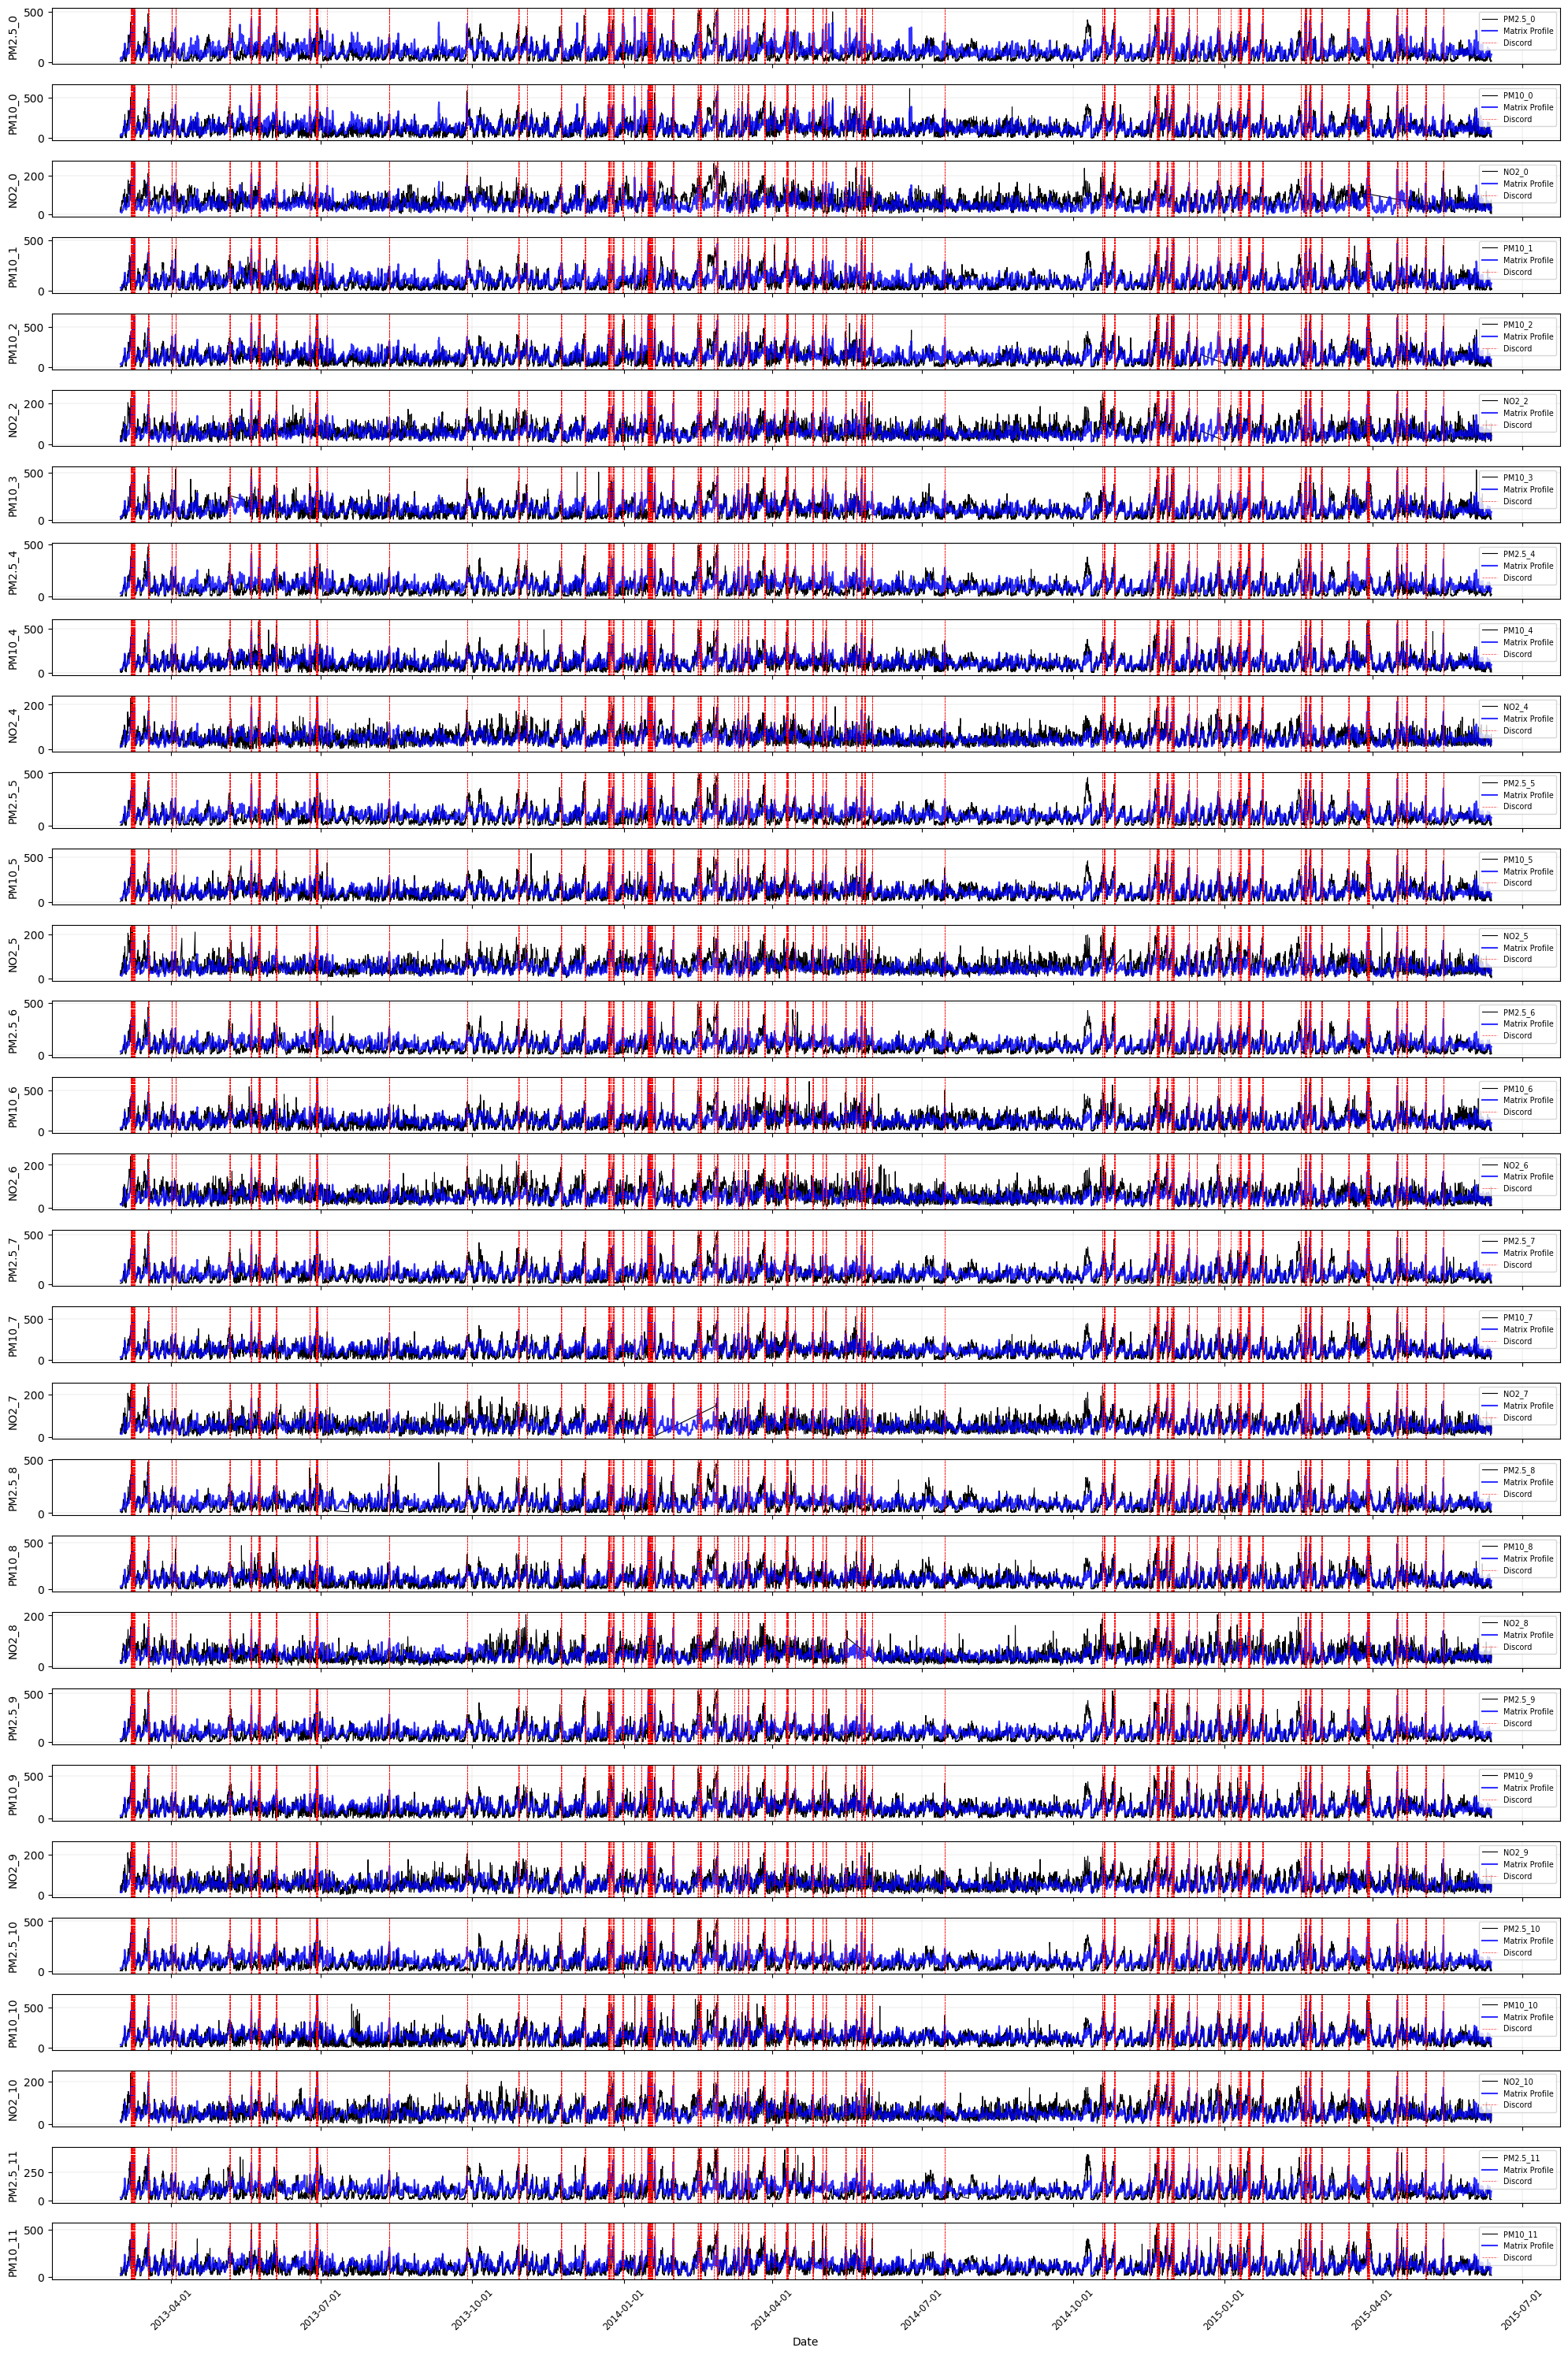

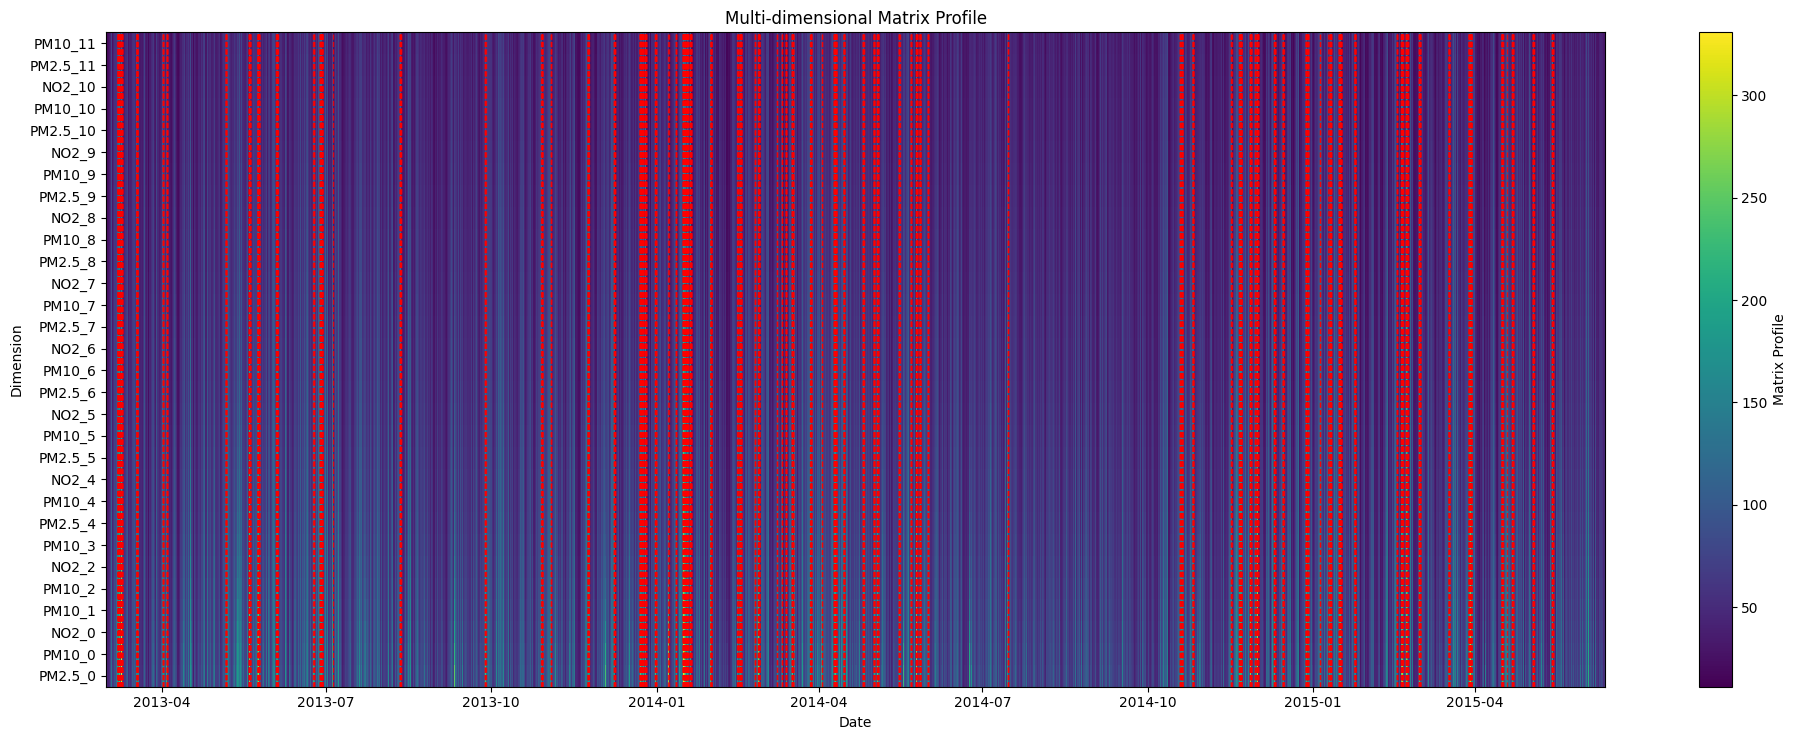

In [3]:
"""
Notebook - Matrix Profile Analysis using ampiimts (Python 3.11)

Goal:
From preprocessed signals (with original values, normalized values, and timestamps),
identify discords and motifs using a fixed-size sliding window based on the matrix profile method (stumpy.maamp).
"""

# %matplotlib widget

import pandas as pd
import os
import ampiimts

# --- Safe loading of input CSV files ---
folder = '../../dataset/air_bejin'
pds = []

with os.scandir(folder) as entries:
    for entry in entries:
        if entry.is_file() and entry.name.endswith('.csv'):
            try:
                df = pd.read_csv(os.path.join(folder, entry.name))
                pds.append(df.iloc[:20_000])  # Load first 10,000 rows only
            except Exception:
                continue

# --- Merge all files into one multivariate DataFrame ---
# --- Preprocessing: interpolation + normalization + optional clustering ---
pds_interpolated, pds_normalized = ampiimts.pre_processed(
    pds,
    sort_by_variables=False,
    cluster=True,
    top_k_cluster=4
)

# --- Compute matrix profile with clustering support ---
matrix_profile_result = ampiimts.matrix_profile(pds_normalized, cluster=True)

# --- Visualization ---
ampiimts.plot_all_patterns_and_discords(pds_interpolated, matrix_profile_result)
ampiimts.plot_all_motif_overlays(pds_interpolated, matrix_profile_result)
